# Model Evaluation

## Cross-Validation Models

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import classification_report

In [2]:
digits = datasets.load_digits()

features = digits.data

target = digits.target

standardizer = StandardScaler()

logit = LogisticRegression()

pipeline = make_pipeline(standardizer, logit)

kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline,features,target, cv=kf, 
                                scoring="accuracy", n_jobs=-1) 

cv_results.mean()

0.964931719428926

In [3]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

pipeline = make_pipeline(standardizer,logit)

cv_results = cross_val_score(pipeline, 
                            features, 
                            target, 
                            cv=kf, 
                            scoring="accuracy", 
                            n_jobs=-1)

## Creating A Basiline Regression Model

In [4]:
boston = load_boston()

features, target = boston.data, boston.target

features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

dummy = DummyRegressor(strategy='mean')

dummy.fit(features_train, target_train)

dummy.score(features_test, target_test)

ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.6354638433202114

## Creating A Basiline Classification Model

In [5]:
iris = load_iris()

features, target = iris.data, iris.target

features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(features_train, target_train)

dummy.score(features_test, target_test)

0.42105263157894735

In [6]:
classifier = RandomForestClassifier()

classifier.fit(features_train, target_train)

classifier.score(features_test, target_test)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9736842105263158

## Evaluating Binary Classifier Predictions

In [7]:
X, y = make_classification(n_samples = 10000,
                            n_features = 3,
                            n_informative = 3,
                            n_redundant = 0,
                            n_classes = 2,
                            random_state = 1)

logit = LogisticRegression()

cross_val_score(logit, X, y, scoring="accuracy")

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

In [8]:
cross_val_score(logit, X, y, scoring="precision")

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95252404, 0.96583282, 0.95558223])

In [9]:
cross_val_score(logit, X, y, scoring="recall")

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95080984, 0.94961008, 0.95558223])

In [10]:
cross_val_score(logit, X, y, scoring="f1")

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95166617, 0.95765275, 0.95558223])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

y_hat = logit.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_hat)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.947

## Evaluating Binary Classifier Thresholds

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


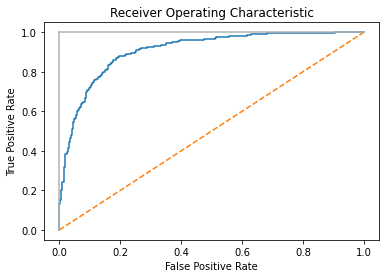

In [12]:
features, target = make_classification(n_samples=10000,
                                        n_features=10,
                                        n_classes=2,
                                        n_informative=3,
                                        random_state=3)

features_train, features_test, target_train, target_test = train_test_split(
                                                        features, target, test_size=0.1, random_state=1)


logit = LogisticRegression()

logit.fit(features_train, target_train)

target_probabilities = logit.predict_proba(features_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [13]:
logit.predict_proba(features_test)[0:1]

array([[0.8688938, 0.1311062]])

In [14]:
logit.classes_

array([0, 1])

In [15]:
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

Threshold: 0.5332422684258307
True Positive Rate: 0.810204081632653
False Positive Rate: 0.14901960784313725


In [16]:
print("Threshold:", threshold[45])
print("True Positive Rate:", true_positive_rate[45])
print("False Positive Rate:", false_positive_rate[45])

Threshold: 0.8189599898953652
True Positive Rate: 0.5448979591836735
False Positive Rate: 0.047058823529411764


In [17]:
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

## Evaluating Multiclass Classifier Predictions 

In [18]:
features, target = make_classification(n_samples = 10000,
                                            n_features = 3,
                                            n_informative = 3,
                                            n_redundant = 0,
                                            n_classes = 3,
                                            random_state = 1)

logit = LogisticRegression()

cross_val_score(logit, features, target, scoring='accuracy')


E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify 

array([0.83653269, 0.8259826 , 0.81308131])

In [19]:
cross_val_score(logit, features, target, scoring='f1_macro')

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify 

array([0.83613125, 0.82562258, 0.81293539])

## Visualizing Classifiers For Performance

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


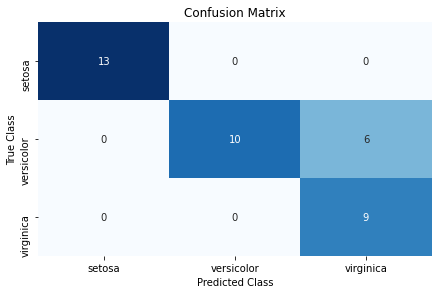

In [20]:
iris = datasets.load_iris()

features = iris.data

target = iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)

classifier = LogisticRegression()

target_predicted = classifier.fit(features_train,
                    target_train).predict(features_test)

matrix = confusion_matrix(target_test, target_predicted)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Evaluating Regression Model

In [21]:
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 3,
                                    n_targets = 1,
                                    noise = 50,
                                    coef = False,
                                    random_state = 1)

ols = LinearRegression()

cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

In [22]:
cross_val_score(ols, features, target, scoring='r2')

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87804558, 0.76395862, 0.89154377])

## Evaluating Clustering Model

In [23]:
features, _ = make_blobs(n_samples = 1000,
                            n_features = 10,
                            centers = 2,
                            cluster_std = 0.5,
                            shuffle = True,
                            random_state = 1)

model = KMeans(n_clusters=2, random_state=1).fit(features)

target_predicted = model.labels_

silhouette_score(features, target_predicted)

0.8916265564072142

## Creating A Custom Evaluation Metric

In [24]:
features, target = make_regression(n_samples = 100,
n_features = 3,
random_state = 1)

features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.10, random_state=1)

def custom_metric(target_test, target_predicted):

    r2 = r2_score(target_test, target_predicted)

    return r2

score = make_scorer(custom_metric, greater_is_better=True)

classifier = Ridge()

model = classifier.fit(features_train, target_train)

score(model, features_test, target_test)

0.9997906102882058

## Visualizing The Effect Of Training Set Size

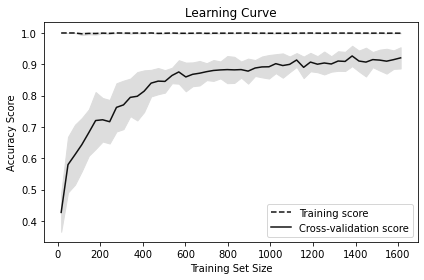

In [28]:
digits = load_digits()

features, target = digits.data, digits.target

train_sizes, train_scores, test_scores = learning_curve(# Classifier
                                                        RandomForestClassifier(),
                                                        features,
                                                        target,
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(
                                                        0.01,
                                                        1.0,
                                                        50))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std,
                train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Creating A Text Report Of Evaluation Metrics

In [32]:
iris = datasets.load_iris()

features = iris.data

target = iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(
                                                            features, target, random_state=1)

classifier = LogisticRegression()

model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

print(classification_report(target_test,
                target_predicted,
                target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38



E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Visualizing The Effect Of Hyperparameter Values

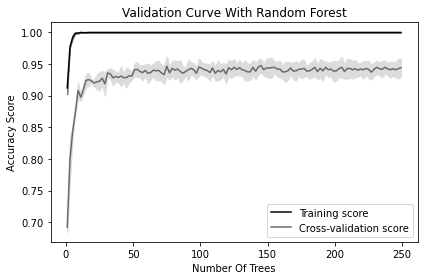

In [35]:
digits = load_digits()

features, target = digits.data, digits.target

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(

                                        RandomForestClassifier(),

                                        features,

                                        target,

                                        param_name="n_estimators",

                                        param_range=param_range,

                                        cv=3,

                                        scoring="accuracy",

                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std,
train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
test_mean + test_std, color="gainsboro")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()